In [26]:
import pandas as pd

df = pd.read_csv("2023_Yellow_Taxi_Trip_Data_January.csv", low_memory=False)

df = df[['tpep_dropoff_datetime', 'DOLocationID', 'trip_distance']]

df = df[df['trip_distance'] > 0.2]


df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['hour'] = df['tpep_dropoff_datetime'].dt.hour
df = df[(df['hour'] >= 8) & (df['hour'] < 20)]

df['weekday'] = df['tpep_dropoff_datetime'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5

dropoff_stats = df.groupby(['DOLocationID', 'hour', 'weekday', 'is_weekend']).size().reset_index(name='dropoff_count')
dropoff_stats.to_csv("zone_hour_dropoff_january.csv", index=False)


In [ ]:
import geopandas as gpd

zones = gpd.read_file("taxi_zones/taxi_zones.shp").to_crs("EPSG:4326")

zones = zones[["zone", "geometry", "LocationID"]]  

zones.to_file("zones_with_busyness.geojson", driver="GeoJSON")


SyntaxError: invalid character '，' (U+FF0C) (1736887159.py, line 5)

In [27]:
import pandas as pd


df_raw = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")


print(df_raw.columns.tolist())
df_raw.head()


['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Location Point1']


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50166449,9505 FOOD CORP,Queens,22401,UNION TPKE,11364.0,9173764215,NaN,01/01/1900,NaN,...,NaN,40.735827,-73.746311,411.0,23.0,129104.0,4165627.0,4.078420e+09,QN42,NaN
1,50121990,ISTANBLUE KEBAB HOUSE,Brooklyn,1416,AVENUE J,11230.0,3477853721,Mediterranean,05/24/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.625092,-73.962074,314.0,44.0,53400.0,3179955.0,3.067160e+09,BK43,NaN
2,50118487,FIVE GUYS,Manhattan,80,MAIDEN LANE,10038.0,6466609202,Hamburgers,06/21/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.707109,-74.007329,101.0,1.0,700.0,1001015.0,1.000420e+09,MN25,NaN
3,50046273,BREADS BAKERY,Manhattan,1890,BROADWAY,10023.0,2126971463,Bakery Products/Desserts,02/10/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.770976,-73.982140,107.0,6.0,14900.0,1027463.0,1.011158e+09,MN14,NaN
4,50150091,SABOR RESTAURANT,Queens,111,JFK INTL AIRPORT,11430.0,6469156122,NaN,01/01/1900,NaN,...,NaN,40.662322,-73.806940,483.0,31.0,71600.0,4542173.0,4.142600e+09,QN98,NaN


In [28]:
df = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")


df_clean = df.rename(columns={
    'DBA': 'name',
    'CUISINE DESCRIPTION': 'cuisine',
    'Latitude': 'lat',
    'Longitude': 'lon'
})


df_clean = df_clean.drop_duplicates(subset=['name', 'lat', 'lon'])


df_clean['category'] = 'restaurant'


df_clean.to_csv("poi_restaurants_cleaned.csv", index=False)


df_clean.head()


,CAMIS,name,BORO,BUILDING,STREET,ZIPCODE,PHONE,cuisine,INSPECTION DATE,ACTION,...,lat,lon,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1,category
0,50166449,9505 FOOD CORP,Queens,22401,UNION TPKE,11364.0,9173764215,NaN,01/01/1900,NaN,...,40.735827,-73.746311,411.0,23.0,129104.0,4165627.0,4.078420e+09,QN42,NaN,restaurant
1,50121990,ISTANBLUE KEBAB HOUSE,Brooklyn,1416,AVENUE J,11230.0,3477853721,Mediterranean,05/24/2022,Violations were cited in the following area(s).,...,40.625092,-73.962074,314.0,44.0,53400.0,3179955.0,3.067160e+09,BK43,NaN,restaurant
2,50118487,FIVE GUYS,Manhattan,80,MAIDEN LANE,10038.0,6466609202,Hamburgers,06/21/2023,Violations were cited in the following area(s).,...,40.707109,-74.007329,101.0,1.0,700.0,1001015.0,1.000420e+09,MN25,NaN,restaurant
3,50046273,BREADS BAKERY,Manhattan,1890,BROADWAY,10023.0,2126971463,Bakery Products/Desserts,02/10/2023,Violations were cited in the following area(s).,...,40.770976,-73.982140,107.0,6.0,14900.0,1027463.0,1.011158e+09,MN14,NaN,restaurant
4,50150091,SABOR RESTAURANT,Queens,111,JFK INTL AIRPORT,11430.0,6469156122,NaN,01/01/1900,NaN,...,40.662322,-73.806940,483.0,31.0,71600.0,4542173.0,4.142600e+09,QN98,NaN,restaurant


In [29]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point


zones = gpd.read_file("taxi_zones/taxi_zones.shp")


restaurants_df = pd.read_csv("poi_restaurants_cleaned.csv")


restaurants_gdf = gpd.GeoDataFrame(
    restaurants_df,
    geometry=gpd.points_from_xy(restaurants_df.lon, restaurants_df.lat),
    crs="EPSG:4326"
)


zones = zones.to_crs("EPSG:4326")


restaurants_with_zone = gpd.sjoin(restaurants_gdf, zones, how="left", predicate='within')


print(restaurants_with_zone.columns) 

restaurant_final = restaurants_with_zone[["name", "category",  "lat", "lon", "LocationID", "zone"]].copy()
print(restaurant_final.head())





Index(['CAMIS', 'name', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'cuisine', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'lat', 'lon',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1', 'category', 'geometry', 'index_right',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough'],
      dtype='object')
                    name    category        lat        lon  LocationID  \
0         9505 FOOD CORP  restaurant  40.735827 -73.746311       175.0   
1  ISTANBLUE KEBAB HOUSE  restaurant  40.625092 -73.962074       165.0   
2              FIVE GUYS  restaurant  40.707109 -74.007329        87.0   
3          BREADS BAKERY  restaurant  40.770976 -73.982140       142.0   
4       SABOR RESTAURANT  restaurant  40.662322 -73.806940       132.0   

                      

In [30]:
import pandas as pd


df_raw = pd.read_csv("Parks_Properties.csv")


print(df_raw.columns.tolist())
df_raw.head()

['ACQUISITIONDATE', 'ACRES', 'ADDRESS', 'BOROUGH', 'CLASS', 'COMMUNITYBOARD', 'COUNCILDISTRICT', 'DEPARTMENT', 'EAPPLY', 'GISOBJID', 'GISPROPNUM', 'GlobalID', 'JURISDICTION', 'LOCATION', 'MAPPED', 'NAME311', 'NYS_ASSEMBLY', 'NYS_SENATE', 'OBJECTID', 'OMPPROPID', 'PARENTID', 'PERMIT', 'PERMITDISTRICT', 'PERMITPARENT', 'PIP_RATABLE', 'PRECINCT', 'RETIRED', 'SIGNNAME', 'SUBCATEGORY', 'TYPECATEGORY', 'US_CONGRESS', 'WATERFRONT', 'ZIPCODE', 'multipolygon']


,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,...,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,US_CONGRESS,WATERFRONT,ZIPCODE,multipolygon
0,01/27/1916 12:00:00 AM,0.545,4901 BROADWAY,M,PARK,112,10,M-12,Dyckman House Museum,100003823.0,...,False,34.0,False,Dyckman House Museum,Historic House,Historic House Park,13.0,False,10034,MULTIPOLYGON (((-73.92305320407046 40.86718368...
1,11/20/2002 12:00:00 AM,0.114,851 HORNADAY PLACE,X,PARK,206,15,X-06,Volky Garden & Flowers,100005124.0,...,False,48.0,False,Volky Garden & Flowers,Greenthumb,Garden,15.0,False,10460,MULTIPOLYGON (((-73.88234391814649 40.84707387...
2,01/19/2006 12:00:00 AM,6.219,78-01 57 AVENUE,Q,PARK,404,30,Q-04,Elmhurst Park,100000211.0,...,True,110.0,False,Elmhurst Park,Neighborhood Park,Community Park,6.0,False,11373,MULTIPOLYGON (((-73.88436854859785 40.72890922...
3,07/10/1902 12:00:00 AM,3.312,76-01 FDR DRIVE,M,PARK,108,5,M-08,John Jay Park,100004745.0,...,True,19.0,False,John Jay Park,Neighborhood Plgd,Community Park,12.0,False,10021,MULTIPOLYGON (((-73.94903734207423 40.76900910...
4,09/04/1839 12:00:00 AM,20.165,18 MT MORRIS PARK WEST,M,PARK,111,9,M-11,Marcus Garvey Park,100004516.0,...,False,25.0,False,Marcus Garvey Park,Large Park,Community Park,13.0,False,10027,MULTIPOLYGON (((-73.94591164848372 40.80390727...


In [31]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

parks_df = pd.read_csv("parks_properties.csv")


parks_df['geometry'] = parks_df['multipolygon'].apply(wkt.loads)


parks_gdf = gpd.GeoDataFrame(parks_df, geometry='geometry', crs="EPSG:4326")


parks_gdf = parks_gdf.rename(columns={
    "SIGNNAME": "name",
    "CLASS": "category"
})


parks_gdf["geometry"] = parks_gdf["geometry"].centroid
parks_gdf["lat"] = parks_gdf.geometry.y
parks_gdf["lon"] = parks_gdf.geometry.x


zones = gpd.read_file("taxi_zones/taxi_zones.shp").to_crs("EPSG:4326")
parks_with_zone = gpd.sjoin(parks_gdf, zones, how="left", predicate="within")


park_final = parks_with_zone[["name", "category", "lat", "lon", "LocationID", "zone"]].copy()
print(park_final.head())





                     name category        lat        lon  LocationID  \
0    Dyckman House Museum     PARK  40.867460 -73.922865       127.0   
1  Volky Garden & Flowers     PARK  40.847018 -73.882535        78.0   
2           Elmhurst Park     PARK  40.729896 -73.885127        82.0   
3           John Jay Park     PARK  40.769239 -73.949483       140.0   
4      Marcus Garvey Park     PARK  40.804486 -73.943669        74.0   

                zone  
0             Inwood  
1       East Tremont  
2           Elmhurst  
3    Lenox Hill East  
4  East Harlem North  


C:\Users\柯蕃\AppData\Local\Temp\ipykernel_24764\2783846987.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks_gdf["geometry"] = parks_gdf["geometry"].centroid


In [32]:
import geopandas as gpd

gdf = gpd.read_file("attractions.geojson")
gdf.head()
print(gdf.columns)


Index(['id', '@id', '@relations', 'access', 'addr:city', 'addr:country',
       'addr:full', 'addr:housename', 'addr:housenumber', 'addr:place',
       ...
       'war_memorial', 'water', 'website', 'website:alternate', 'wheelchair',
       'wikidata', 'wikimedia_commons', 'wikipedia', 'year_of_construction',
       'geometry'],
      dtype='object', length=250)


In [33]:
import geopandas as gpd


gdf = gpd.read_file("attractions.geojson")


useful_fields = ["name", "tourism", "geometry"]
available_fields = [col for col in useful_fields if col in gdf.columns]
gdf_clean = gdf[available_fields].copy()


gdf_clean["name"] = gdf_clean.get("name", "").fillna("")
gdf_clean["tourism"] = gdf_clean.get("tourism", "").fillna("")


gdf_clean["category"] = "attraction"
gdf_clean["description"] = gdf_clean["tourism"]


gdf_proj = gdf_clean.to_crs(epsg=2263)                   
gdf_proj["geometry"] = gdf_proj.geometry.centroid       
gdf_clean = gdf_proj.to_crs(epsg=4326)                    


gdf_clean["lat"] = gdf_clean.geometry.y
gdf_clean["lon"] = gdf_clean.geometry.x


zones = gpd.read_file("taxi_zones/taxi_zones.shp").to_crs("EPSG:4326")
attractions_with_zone = gpd.sjoin(gdf_clean, zones, how="left", predicate="within")


attractions_final = attractions_with_zone[[
    "name", "category", "lat", "lon", "LocationID", "zone"
]].copy()


print(attractions_final.head())





                                     name    category        lat        lon  \
0                              The Dakota  attraction  40.776775 -73.976147   
1      Cathedral of Saint John the Divine  attraction  40.803748 -73.961661   
2  Thomas Edison National Historical Park  attraction  40.785497 -74.238154   
3                           The Cloisters  attraction  40.864826 -73.931851   
4                           The High Line  attraction  40.748086 -74.005109   

   LocationID                       zone  
0       142.0        Lincoln Square East  
1       166.0        Morningside Heights  
2         NaN                        NaN  
3       243.0   Washington Heights North  
4       246.0  West Chelsea/Hudson Yards  


In [34]:
import geopandas as gpd


gdf = gpd.read_file("pubs.geojson")


useful_fields = ["name", "amenity", "geometry"]
available_fields = [col for col in useful_fields if col in gdf.columns]
gdf_clean = gdf[available_fields].copy()


gdf_clean["name"] = gdf_clean.get("name", "").fillna("")
gdf_clean["amenity"] = gdf_clean.get("amenity", "").fillna("")


gdf_clean["category"] = "pub"
gdf_clean["description"] = gdf_clean["amenity"]


gdf_proj = gdf_clean.to_crs(epsg=2263)
gdf_proj["geometry"] = gdf_proj.geometry.centroid
gdf_clean = gdf_proj.to_crs(epsg=4326)


gdf_clean["lat"] = gdf_clean.geometry.y
gdf_clean["lon"] = gdf_clean.geometry.x


zones = gpd.read_file("taxi_zones/taxi_zones.shp").to_crs("EPSG:4326")
pub_with_zone = gpd.sjoin(gdf_clean, zones, how="left", predicate="within")


pub_final = pub_with_zone[[
    "name", "category",  "lat", "lon", "LocationID", "zone"
]].copy()


print(pub_final.head())


                   name category        lat        lon  LocationID  \
0             46 Lounge      pub  40.893529 -74.230798         NaN   
1             Lucky Dog      pub  40.713499 -73.961716       256.0   
2  SingleCut Beersmiths      pub  40.778296 -73.901672       223.0   
3         Mike's Tavern      pub  40.679731 -73.849985       180.0   
4          Webster Hall      pub  40.731768 -73.989090        79.0   

                        zone  
0                        NaN  
1  Williamsburg (South Side)  
2                   Steinway  
3                 Ozone Park  
4               East Village  


In [35]:
import geopandas as gpd


gdf = gpd.read_file("museums.geojson")


useful_fields = ["name", "tourism", "geometry"]
available_fields = [col for col in useful_fields if col in gdf.columns]
gdf_clean = gdf[available_fields].copy()


gdf_clean["name"] = gdf_clean.get("name", "").fillna("")
gdf_clean["tourism"] = gdf_clean.get("tourism", "").fillna("")


gdf_clean["category"] = "museum"
gdf_clean["description"] = gdf_clean["tourism"]


gdf_proj = gdf_clean.to_crs(epsg=2263)
gdf_proj["geometry"] = gdf_proj.geometry.centroid
gdf_clean = gdf_proj.to_crs(epsg=4326)


gdf_clean["lat"] = gdf_clean.geometry.y
gdf_clean["lon"] = gdf_clean.geometry.x


zones = gpd.read_file("taxi_zones/taxi_zones.shp").to_crs("EPSG:4326")
museum_with_zone = gpd.sjoin(gdf_clean, zones, how="left", predicate="within")


museum_final = museum_with_zone[[
    "name", "category",  "lat", "lon", "LocationID", "zone"
]].copy()


print(museum_final.head())


                             name category        lat        lon  LocationID  \
0     New-York Historical Society   museum  40.779281 -73.974249       239.0   
1  The Metropolitan Museum of Art   museum  40.779436 -73.963434        43.0   
2                   Fort Schuyler   museum  40.805274 -73.791573       208.0   
3       Museum of Jewish Heritage   museum  40.706068 -74.018650        13.0   
4          Liberty Science Center   museum  40.708234 -74.054630         NaN   

                           zone  
0         Upper West Side South  
1                  Central Park  
2  Schuylerville/Edgewater Park  
3             Battery Park City  
4                           NaN  


In [36]:
import geopandas as gpd


gdf = gpd.read_file("cafe.geojson")


useful_fields = ["name", "amenity", "geometry"]
available_fields = [col for col in useful_fields if col in gdf.columns]
gdf_clean = gdf[available_fields].copy()


gdf_clean["name"] = gdf_clean.get("name", "").fillna("")
gdf_clean["amenity"] = gdf_clean.get("amenity", "").fillna("")


gdf_clean["category"] = "cafe"
gdf_clean["description"] = gdf_clean["amenity"]


gdf_proj = gdf_clean.to_crs(epsg=2263)
gdf_proj["geometry"] = gdf_proj.geometry.centroid
gdf_clean = gdf_proj.to_crs(epsg=4326)


gdf_clean["lat"] = gdf_clean.geometry.y
gdf_clean["lon"] = gdf_clean.geometry.x


zones = gpd.read_file("taxi_zones/taxi_zones.shp").to_crs("EPSG:4326")
cafe_with_zone = gpd.sjoin(gdf_clean, zones, how="left", predicate="within")


cafe_final = cafe_with_zone[[
    "name", "category",  "lat", "lon", "LocationID", "zone"
]].copy()


print(cafe_final.head())


                  name category        lat        lon  LocationID         zone
0         Rethink Cafe     cafe  40.693424 -73.969064        97.0  Fort Greene
1   The Chocolate Room     cafe  40.684768 -73.994454        25.0  Boerum Hill
2                Amano     cafe  40.684084 -73.992426        25.0  Boerum Hill
3            Bar Tabac     cafe  40.687369 -73.990274        25.0  Boerum Hill
4  Liberty Coffee Shop     cafe  40.679738 -73.850297       180.0   Ozone Park


In [37]:
import pandas as pd

df = pd.read_csv("MTA_Subway_Jan.csv")

print(df.columns)
print(df.dtypes)
print(df.head())


Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')
transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership                int64
transfers                int64
latitude               float64
longitude              float64
Georeference            object
dtype: object
        transit_timestamp transit_mode station_complex_id  station_complex  \
0  01/01/2023 07:00:00 PM       subway                207  Beach 36 St (A)   
1  01/01/2023 07:00:00 PM       subway                407     Astor Pl (6)   
2  01/01/2023 07:00:00 PM       subway                272      36 St (M,R)   
3  01/01/2023 07:00:00 PM       subway                 82    

In [38]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

df = pd.read_csv("MTA_Subway_Jan.csv")

df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')
df['hour'] = df['transit_timestamp'].dt.hour
df['weekday'] = df['transit_timestamp'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5
df = df[(df['hour'] >= 8) & (df['hour'] < 20)]


df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_subway = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")


zones = gpd.read_file("taxi_zones/taxi_zones.shp").to_crs("EPSG:4326")


gdf_joined = gpd.sjoin(gdf_subway, zones[['geometry', 'LocationID']], how='left', predicate='within')


gdf_joined[['station_complex', 'hour', 'LocationID']].head()

subway_stats = gdf_joined.groupby(['LocationID', 'hour', 'weekday', 'is_weekend'])['ridership'].sum().reset_index()
subway_stats.rename(columns={'ridership': 'total_ridership'}, inplace=True)

subway_stats.to_csv("zone_hour_subway_january.csv", index=False)



In [39]:
import pandas as pd

# Step 1: 读取 drop-off 和 subway 数据
dropoff_df = pd.read_csv("zone_hour_dropoff_january.csv")
subway_df = pd.read_csv("zone_hour_subway_january.csv")

dropoff_df.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)


# Step 2: 合并两者（以 LocationID + hour + weekday + is_weekend 为键）
merged = pd.merge(
    dropoff_df,
    subway_df,
    on=["LocationID", "hour", "weekday", "is_weekend"],
    how="outer"
).fillna(0)  # 缺失填 0，表示该小时该区域无记录

# Step 3: 构造 busyness_score
merged["busyness_score"] = merged["dropoff_count"] + merged["total_ridership"]

# Step 4: 分箱构造 busyness_level（3 等级）
merged["busyness_level"] = pd.qcut(merged["busyness_score"], q=3, labels=["low", "medium", "high"])

# Step 5: 保存结果
merged.to_csv("zone_hour_busyness_labels_january.csv", index=False)


In [40]:
all_poi = pd.concat([
    cafe_final,
    museum_final,
    pub_final,
    restaurant_final,
    park_final,
    attractions_final
], ignore_index=True)

all_poi.head()


,name,category,lat,lon,LocationID,zone
0,Rethink Cafe,cafe,40.693424,-73.969064,97.0,Fort Greene
1,The Chocolate Room,cafe,40.684768,-73.994454,25.0,Boerum Hill
2,Amano,cafe,40.684084,-73.992426,25.0,Boerum Hill
3,Bar Tabac,cafe,40.687369,-73.990274,25.0,Boerum Hill
4,Liberty Coffee Shop,cafe,40.679738,-73.850297,180.0,Ozone Park


In [41]:
all_poi.to_csv("all_poi_data.csv", index=False)

In [49]:
# Step 1: Check missing values before cleaning
print("Missing values before cleaning:")
print(all_poi.isnull().sum())

# Step 2: Remove rows with any NaN values
all_poi_cleaned = all_poi.dropna()

# Step 3: Remove rows where the 'name' field is an empty string or only whitespace
all_poi_cleaned = all_poi_cleaned[all_poi_cleaned['name'].str.strip().astype(bool)]

# Step 4: Check missing values after cleaning
print("\nMissing values after cleaning:")
print(all_poi_cleaned.isnull().sum())

# Step 5: Save the cleaned DataFrame to CSV
all_poi_cleaned.to_csv("all_poi_cleaned.csv", index=False)



Missing values before cleaning:
name             4
category         0
lat            129
lon            129
LocationID    1030
zone          1030
dtype: int64

Missing values after cleaning:
name          0
category      0
lat           0
lon           0
LocationID    0
zone          0
dtype: int64


In [43]:
zone_category_pairs = all_poi[['LocationID', 'category']].drop_duplicates()
import itertools

hours = list(range(8, 21)) 
weekdays = list(range(7))

time_grid = pd.DataFrame(itertools.product(hours, weekdays), columns=['hour', 'weekday'])
time_grid['is_weekend'] = time_grid['weekday'] >= 5

zone_category_pairs['key'] = 1
time_grid['key'] = 1
samples = zone_category_pairs.merge(time_grid, on='key').drop('key', axis=1)
labels = pd.read_csv("zone_hour_busyness_labels_january.csv")


samples = samples.merge(
    labels[['LocationID', 'hour', 'weekday', 'is_weekend', 'busyness_level']],
    on=['LocationID', 'hour', 'weekday', 'is_weekend'],
    how='left'
).dropna()



In [44]:
samples.to_csv("zone_hour_busyness_labeled_samples.csv", index=False)


In [45]:
import pandas as pd

df = pd.read_csv("zone_hour_busyness_labeled_samples.csv")


missing_report = df.isnull().sum()
print("🕵️ 缺失值检查：")
print(missing_report)


print("\n📍 含缺失的样本行（如有）：")
print(df[df.isnull().any(axis=1)].head())


🕵️ 缺失值检查：
LocationID        0
category          0
hour              0
weekday           0
is_weekend        0
busyness_level    0
dtype: int64

📍 含缺失的样本行（如有）：
Empty DataFrame
Columns: [LocationID, category, hour, weekday, is_weekend, busyness_level]
Index: []


In [46]:
# 读取保存的数据（确认保存无误）
df = pd.read_csv("zone_hour_busyness_labeled_samples.csv")

# 查看前几行数据
print(df.head())

# 查看列名和数据类型
print(df.dtypes)

# 检查是否有重复样本（以 LocationID + hour + weekday + category 为判断标准）
duplicates = df.duplicated(subset=["LocationID", "category", "hour", "weekday"])
print("⚠️ 重复样本数：", duplicates.sum())

# 检查 busyness_level 标签分布
print("📊 标签分布：\n", df["busyness_level"].value_counts())


   LocationID category  hour  weekday  is_weekend busyness_level
0        97.0     cafe     8        0       False           high
1        97.0     cafe     8        1       False           high
2        97.0     cafe     8        2       False           high
3        97.0     cafe     8        3       False           high
4        97.0     cafe     8        4       False           high
LocationID        float64
category           object
hour                int64
weekday             int64
is_weekend           bool
busyness_level     object
dtype: object
⚠️ 重复样本数： 0
📊 标签分布：
 busyness_level
high      29487
medium    23157
low       20363
Name: count, dtype: int64


C:\Users\柯蕃\AppData\Local\Temp\ipykernel_5648\499874233.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='busyness_level', data=df, order=['low', 'medium', 'high'], palette="Set2")


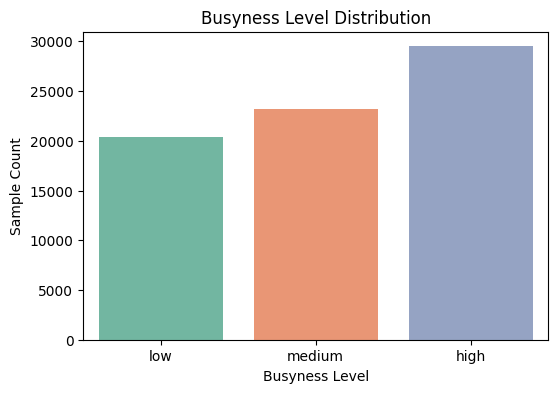

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取你上传的已打标签数据
df = pd.read_csv("zone_hour_busyness_labeled_samples.csv")

# 绘制标签分布柱状图
plt.figure(figsize=(6, 4))
sns.countplot(x='busyness_level', data=df, order=['low', 'medium', 'high'], palette="Set2")

plt.title("Busyness Level Distribution")
plt.xlabel("Busyness Level")
plt.ylabel("Sample Count")
plt.show()


c:\Anconda\envs\homework1py311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Anconda\envs\homework1py311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:48:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


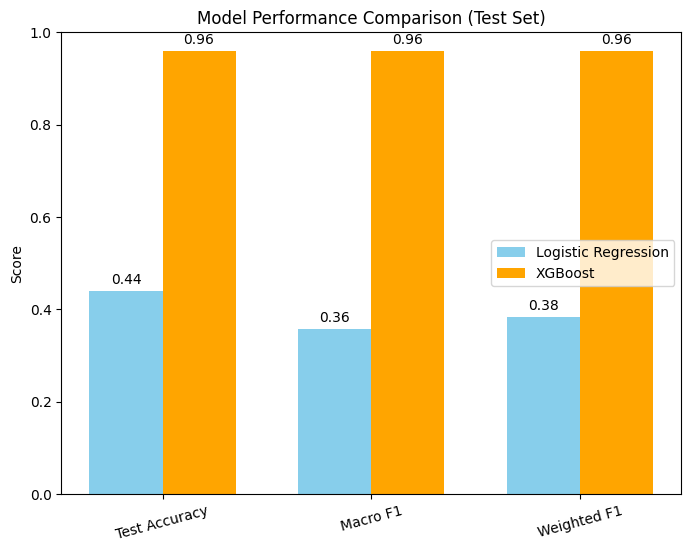

✅ Logistic Regression Results:
Test Accuracy: 0.440
Macro F1: 0.357
Weighted F1: 0.383

✅ XGBoost Results:
Test Accuracy: 0.959
Macro F1: 0.960
Weighted F1: 0.959


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 读取数据
df = pd.read_csv("zone_hour_busyness_labeled_samples.csv")

# 特征准备：LocationID 保留数值，is_weekend 转为 0/1
X = df[['LocationID', 'hour', 'weekday', 'is_weekend']].copy()
X['is_weekend'] = X['is_weekend'].astype(int)

# 目标标签编码
y = df['busyness_level']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# 评估函数
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    acc = report['accuracy']
    macro_f1 = report['macro avg']['f1-score']
    weighted_f1 = report['weighted avg']['f1-score']
    return acc, macro_f1, weighted_f1

# Logistic Regression
lr = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial')
acc_lr, macro_f1_lr, weighted_f1_lr = evaluate_model(lr, X_train, X_test, y_train, y_test)

# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=6, eval_metric='mlogloss', use_label_encoder=False)
acc_xgb, macro_f1_xgb, weighted_f1_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test)

# 汇总指标
metrics = ["Test Accuracy", "Macro F1", "Weighted F1"]
lr_scores = [acc_lr, macro_f1_lr, weighted_f1_lr]
xgb_scores = [acc_xgb, macro_f1_xgb, weighted_f1_xgb]

# 可视化对比
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', color="skyblue")
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color="orange")

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Test Set)')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=15)
ax.set_ylim(0, 1)
ax.legend()

# 标注具体数值
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

# 输出具体指标
print("✅ Logistic Regression Results:")
print(f"Test Accuracy: {acc_lr:.3f}")
print(f"Macro F1: {macro_f1_lr:.3f}")
print(f"Weighted F1: {weighted_f1_lr:.3f}\n")

print("✅ XGBoost Results:")
print(f"Test Accuracy: {acc_xgb:.3f}")
print(f"Macro F1: {macro_f1_xgb:.3f}")
print(f"Weighted F1: {weighted_f1_xgb:.3f}")


c:\Anconda\envs\homework1py311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


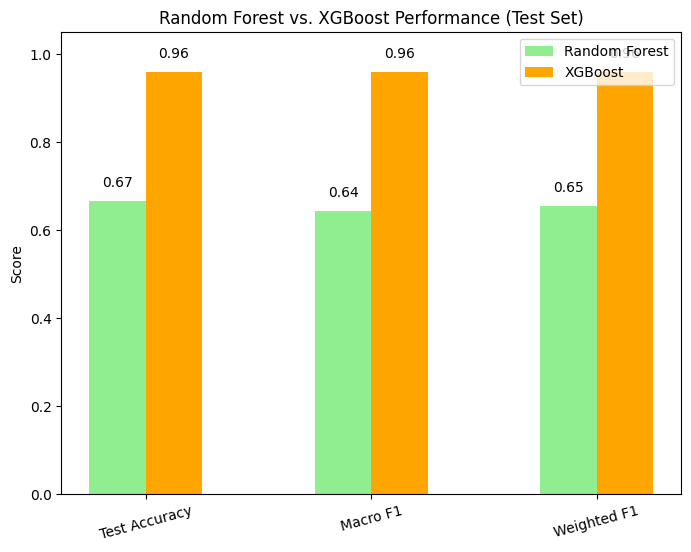

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 读取数据
df = pd.read_csv("zone_hour_busyness_labeled_samples.csv")

# 特征准备：LocationID 保留数值，is_weekend 转为 0/1
X = df[['LocationID', 'hour', 'weekday', 'is_weekend']].copy()
X['is_weekend'] = X['is_weekend'].astype(int)

# 标签编码
y = df['busyness_level']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# 评估函数
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    acc = report['accuracy']
    macro_f1 = report['macro avg']['f1-score']
    weighted_f1 = report['weighted avg']['f1-score']
    return acc, macro_f1, weighted_f1

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
acc_rf, macro_f1_rf, weighted_f1_rf = evaluate_model(rf, X_train, X_test, y_train, y_test)

# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=6, eval_metric='mlogloss', use_label_encoder=False)
acc_xgb, macro_f1_xgb, weighted_f1_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test)

# 汇总指标
metrics = ["Test Accuracy", "Macro F1", "Weighted F1"]
rf_scores = [acc_rf, macro_f1_rf, weighted_f1_rf]
xgb_scores = [acc_xgb, macro_f1_xgb, weighted_f1_xgb]

x = np.arange(len(metrics))
width = 0.25  # 保持较窄，防止重叠

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color="lightgreen")
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color="orange")

# 添加数值标签，避免标签被遮挡，偏移设置大一点
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 8),  # 提高偏移高度
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 8),  # 提高偏移高度
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('Score')
ax.set_title('Random Forest vs. XGBoost Performance (Test Set)')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=15)
ax.set_ylim(0, 1.05)  # 给顶部留一点空间
ax.legend()

plt.show()



c:\Anconda\envs\homework1py311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


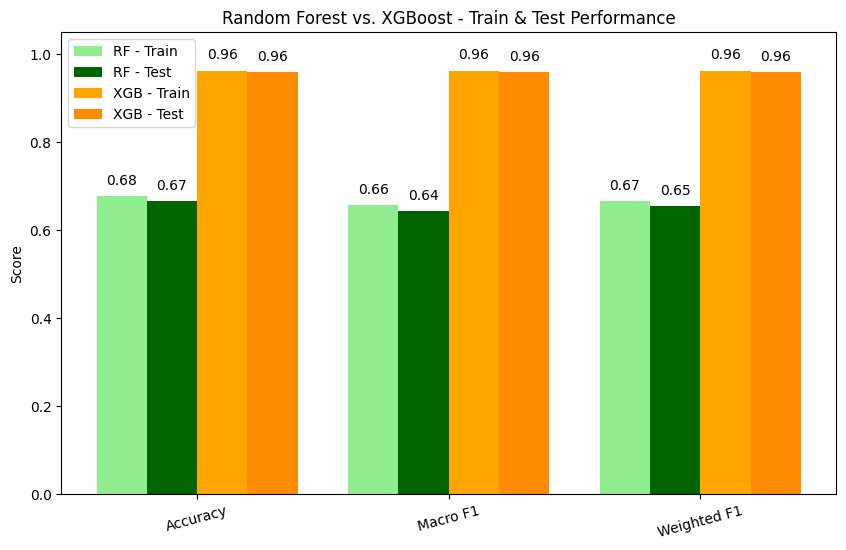

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


df = pd.read_csv("zone_hour_busyness_labeled_samples.csv")


X = df[['LocationID', 'hour', 'weekday', 'is_weekend']].copy()
X['is_weekend'] = X['is_weekend'].astype(int)
y = df['busyness_level']
le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    
    return {
        "Train Accuracy": report_train['accuracy'],
        "Train Macro F1": report_train['macro avg']['f1-score'],
        "Train Weighted F1": report_train['weighted avg']['f1-score'],
        "Test Accuracy": report_test['accuracy'],
        "Test Macro F1": report_test['macro avg']['f1-score'],
        "Test Weighted F1": report_test['weighted avg']['f1-score']
    }


rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_results = evaluate_model(rf, X_train, y_train, X_test, y_test)

xgb = XGBClassifier(n_estimators=50, max_depth=6, eval_metric='mlogloss', use_label_encoder=False)
xgb_results = evaluate_model(xgb, X_train, y_train, X_test, y_test)


metrics = ["Accuracy", "Macro F1", "Weighted F1"]
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))


bars_rf_train = ax.bar(x - width*1.5, [rf_results[f"Train {m}"] for m in metrics], width, label='RF - Train', color="lightgreen")
bars_rf_test = ax.bar(x - width/2, [rf_results[f"Test {m}"] for m in metrics], width, label='RF - Test', color="darkgreen")
bars_xgb_train = ax.bar(x + width/2, [xgb_results[f"Train {m}"] for m in metrics], width, label='XGB - Train', color="orange")
bars_xgb_test = ax.bar(x + width*1.5, [xgb_results[f"Test {m}"] for m in metrics], width, label='XGB - Test', color="darkorange")


for bars in [bars_rf_train, bars_rf_test, bars_xgb_train, bars_xgb_test]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 6),
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_ylabel('Score')
ax.set_title('Random Forest vs. XGBoost - Train & Test Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=15)
ax.set_ylim(0, 1.05)
ax.legend()

plt.show()
